## 🔧 Step 1: Install Required Libraries
We'll install TensorFlow for building the neural network, and scikit-learn for encoding labels.


In [8]:
!pip install -q tensorflow sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


## 📦 Step 2: Import Dependencies
We'll import all the necessary Python libraries for text processing, model building, and training.


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## 💬 Step 3: Define Sample Texts and Labels
Here, we define simple training phrases and label them with their corresponding emotions: Happy, Sad, or Angry.


In [10]:
# Sample text phrases and corresponding emotion labels
texts = [
    "I love this day", "This is amazing", "So happy and joyful",
    "I feel sad", "This is terrible", "I am depressed",
    "I am so angry", "Why is this happening", "I hate this"
]

labels = ["happy", "happy", "happy",
          "sad", "sad", "sad",
          "angry", "angry", "angry"]


## 🧹 Step 4: Preprocess Text Data and Labels
We encode the labels to numeric form and tokenize the text into sequences of integers.


In [11]:
# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Tokenize text
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, padding='post')

vocab_size = len(tokenizer.word_index) + 1
max_length = padded.shape[1]
num_classes = len(set(encoded_labels))


## 🏗️ Step 5: Build the Emotion Classifier Model
We create a simple text classification model using an embedding layer, pooling, and dense layers.


In [12]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=16, input_length=max_length),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## 🧠 Step 6: Train the Model
We train the neural network on our sample data for 100 epochs.


In [13]:
history = model.fit(padded, np.array(encoded_labels), epochs=100, verbose=0)
print("Training Complete!")


Training Complete!


## 🎯 Step 7: Test the Classifier on New Phrases
This function takes any input text and predicts the emotion using our trained model.


In [14]:
def classify_text(input_text):
    seq = tokenizer.texts_to_sequences([input_text])
    pad = pad_sequences(seq, maxlen=max_length, padding='post')
    pred = model.predict(pad)[0]
    emotion = label_encoder.inverse_transform([np.argmax(pred)])
    print(f"Input: {input_text}\nPredicted Emotion: {emotion[0]}")

# Try it!
classify_text("I am so joyful today!")
classify_text("This is awful")
classify_text("You ruined everything")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Input: I am so joyful today!
Predicted Emotion: angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Input: This is awful
Predicted Emotion: sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Input: You ruined everything
Predicted Emotion: sad


## 📈 Step 8: Visualize Model Accuracy and Loss Over Epochs
This plot helps us understand how the model performed during training.


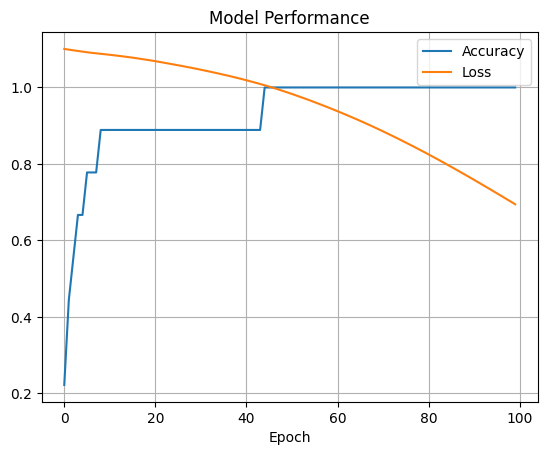

In [15]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.title('Model Performance')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()
